In [11]:
import pandas as pd
import numpy as np

#*****scaling data for standardisation*****#
from sklearn import preprocessing

#*****spliting data for train vs test*****#
from sklearn.model_selection import train_test_split,KFold, cross_val_score

#*****feature selection*****#
from sklearn.feature_selection import RFE

#******models*****#
from sklearn import linear_model
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm


#*****metrics for evaluating models*****#
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,roc_auc_score


#*****graphs*********#
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import seaborn as sn

In [24]:
pf = pd.read_csv('diabetes.csv')

In [25]:
pf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
pf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
pf.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
#distribution
pf.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [69]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [7]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

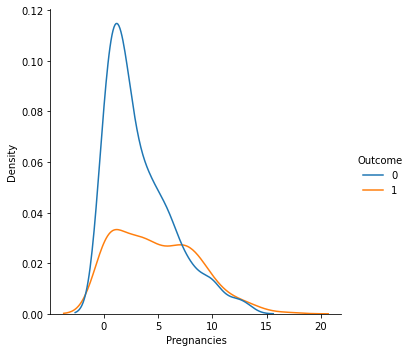

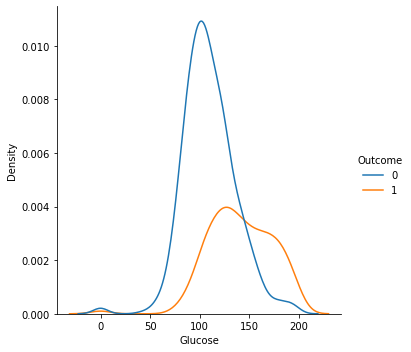

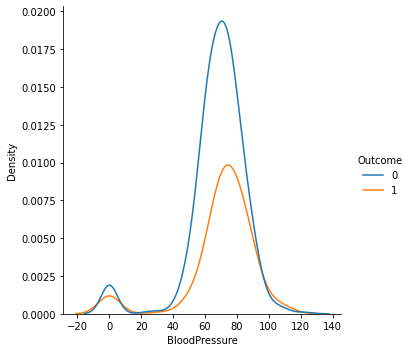

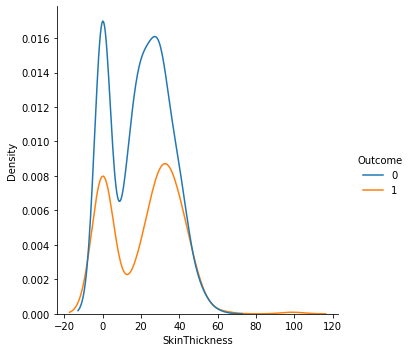

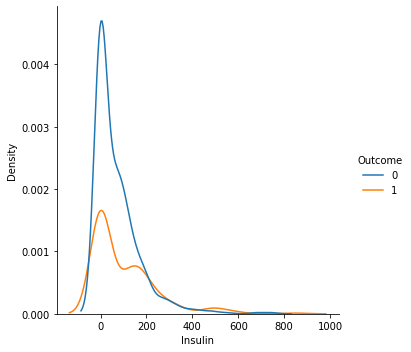

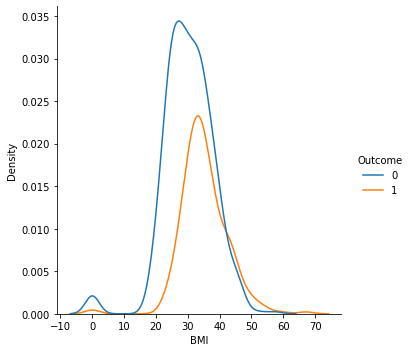

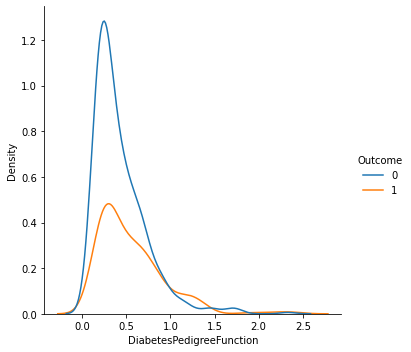

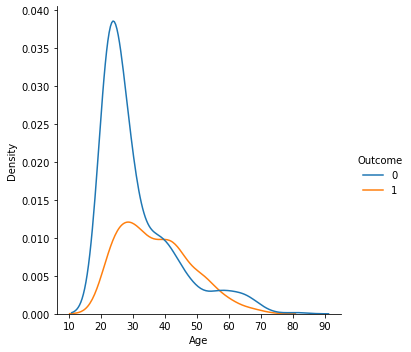

In [8]:
for var in cols:
    sn.displot(pf, x=var,kind='kde',hue='Outcome')

In [ ]:
# ******************************************Decision Tree************************************************
# feature selection
# model training on the training set
# model validation on the test set
# validation reports : confusion matrix, Precision, Recall, F1-Score
#********************************************************************************************************

In [ ]:
#decision tree

In [116]:
features_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [117]:
X=pf[features_cols] 
y=pf[['Outcome']]

In [149]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [151]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
580,0,151,90,46,0,42.1,0.371,21
418,1,83,68,0,0,18.2,0.624,27
764,2,122,70,27,0,36.8,0.340,27
363,4,146,78,0,0,38.5,0.520,67
757,0,123,72,0,0,36.3,0.258,52
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [186]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf_tree = tree.DecisionTreeClassifier(max_depth=5, random_state=0)
clf_tree.fit(X_train, y_train)
y_test_pred=clf_tree.predict(X_test)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [188]:
confusion_matrix(y_test, y_test_pred)

array([[132,  25],
       [ 30,  44]])

In [22]:
feature_names = features_cols
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_test_pred, target_names=target_names))

#predicition is better for 'without diabetes' than 'with diabetes'
#target: with diabetes

#without diabetes: 130 + 27 = TN + FP = 157
#with diabetes: 34 + 40  = FN + TP = 74
#precision:0.6 recall:0.54


#target: without diabetes
#without diabetes: 130 + 27 = TP + FN = 157
#with diabetest: 34 + 40 = FP + TN = 74

#precision = TP/(TP+FP)
#recall = TP/(TP+FN)
#F1-Score = 2/ (1/precision+1/recall)

                  precision    recall  f1-score   support

without diabetes       0.80      0.83      0.82       157
   with diabetes       0.62      0.57      0.59        74

        accuracy                           0.75       231
       macro avg       0.71      0.70      0.71       231
    weighted avg       0.74      0.75      0.75       231



In [95]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 144.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 30.45
|   |   |   |--- feature_0 <= 7.00
|   |   |   |   |--- feature_6 <= 0.67
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.67
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  7.00
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  30.45
|   |   |   |--- feature_2 <= 53.00
|   |   |   |   |--- feature_3 <= 36.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  36.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  53.00
|   |   |   |   |--- feature_6 <= 1.18
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  1.18
|   |   |   |   |   |--- class: 1
|   |--- feature_7 >  28.50
|   |   |--- feature_5 <= 26.35
|   |   |   |--- feature_2 <= 94.00
|   |   |   |   |--- feature_1 <= 131.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  131.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_

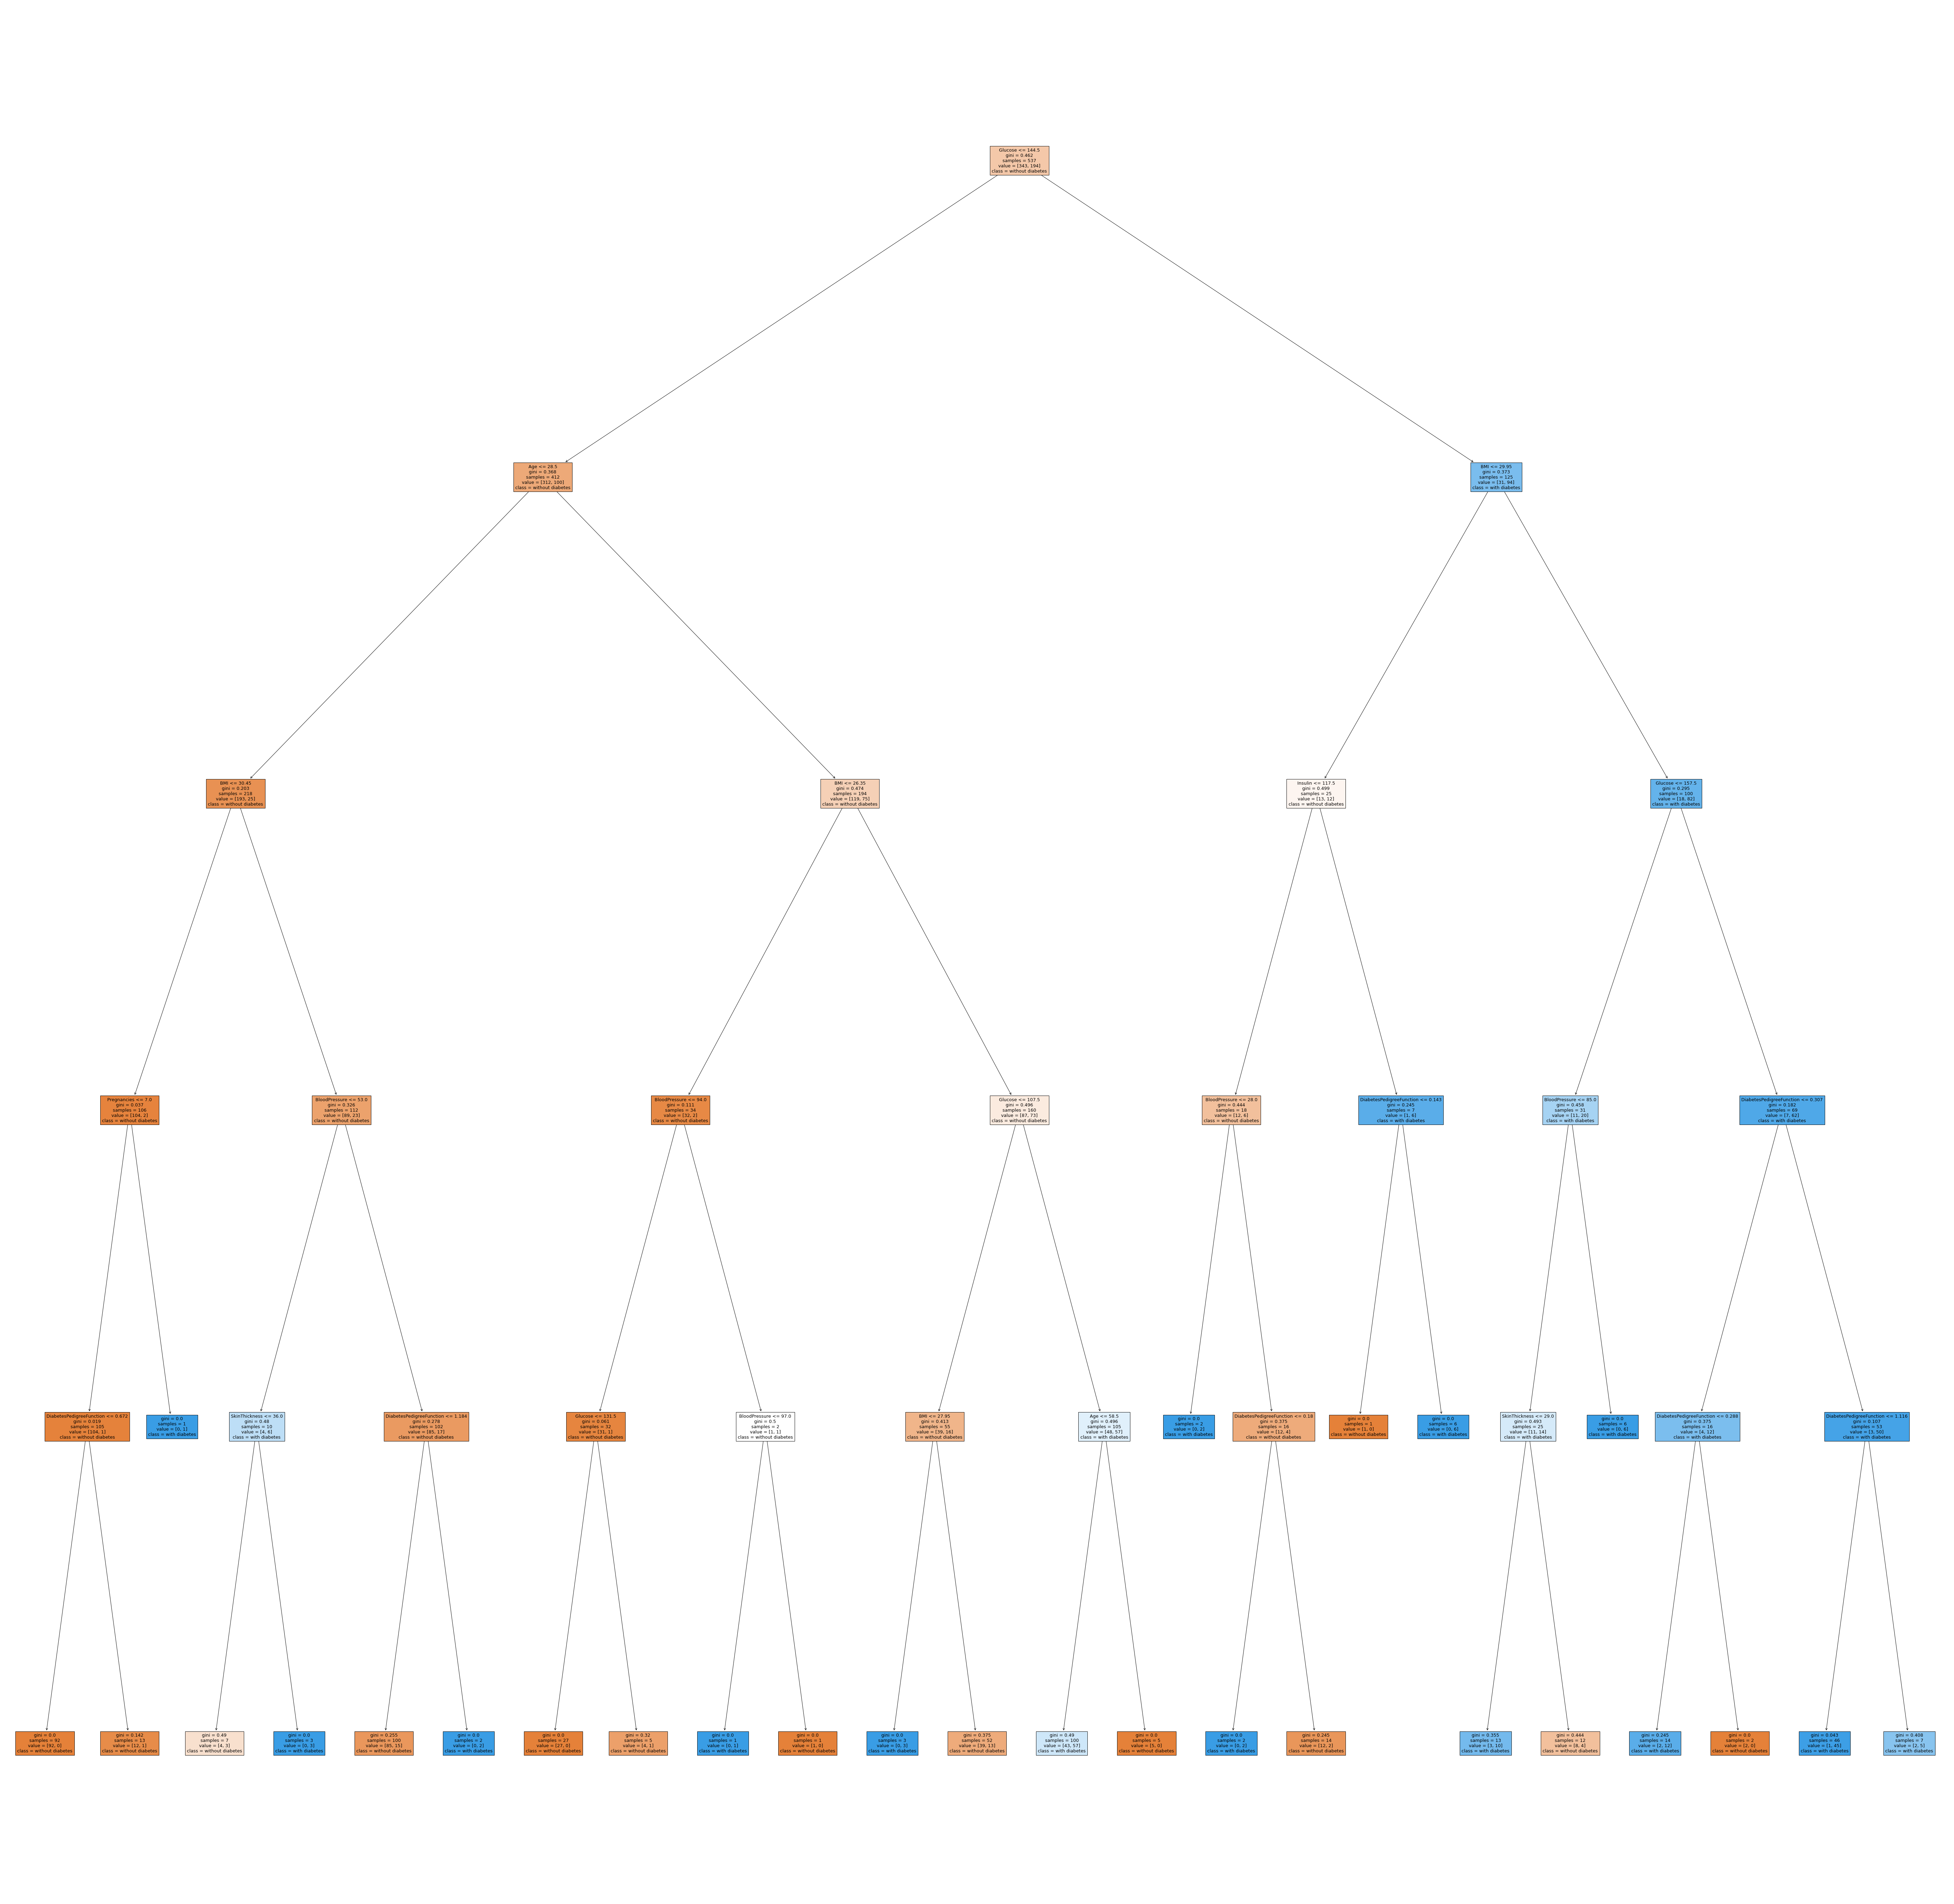

In [96]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

In [ ]:
#***************************************************SVM************************************************
# feature selection
# model training on the training set
# model validation on the test set
# validation reports : confusion matrix, Precision, Recall, F1-Score
#********************************************************************************************************

In [65]:
X=pf[features_cols]
y=pf[['Outcome']]

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf_svm = svm.SVC(kernel='linear') # Linear Kernel
clf_svm.fit(X_train, y_train)
y_test_pred=clf_svm.predict(X_test)

/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
confusion_matrix(y_test, y_test_pred)

array([[141,  16],
       [ 34,  40]])

In [85]:
feature_names = features_cols
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_test_pred, target_names=target_names))
#predicition is better for 'without diabetes' than 'with diabetes'

                  precision    recall  f1-score   support

without diabetes       0.81      0.90      0.85       157
   with diabetes       0.71      0.54      0.62        74

        accuracy                           0.78       231
       macro avg       0.76      0.72      0.73       231
    weighted avg       0.78      0.78      0.77       231



In [ ]:
#***********************************logistic Regression (Continuous)***********************************
# feature selection
# model training on the training set
# model validation on the test set
# validation reports : confusion matrix, Precision, Recall, F1-Score
#********************************************************************************************************

In [108]:
#Logistic Regression - continuous 
X=pf[features_cols]
y=pf[['Outcome']]

In [109]:
#Create a logistic regression classifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf_logr = linear_model.LogisticRegression(max_iter=1000)
#clf_rfe = RFE(clf_logr)
#clf_rfe.fit(X_train,y_train)
#y_test_pred=clf_rfe.predict(X_test)
clf_logr.fit(X_train,y_train)
y_test_pred=clf_logr.predict(X_test)

/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
confusion_matrix(y_test, y_test_pred)

array([[139,  18],
       [ 49,  25]])

In [111]:
feature_names = features_cols
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_test_pred, target_names=target_names))
#predicition is better for 'without diabetes' than 'with diabetes'

                  precision    recall  f1-score   support

without diabetes       0.74      0.89      0.81       157
   with diabetes       0.58      0.34      0.43        74

        accuracy                           0.71       231
       macro avg       0.66      0.61      0.62       231
    weighted avg       0.69      0.71      0.68       231



In [107]:
pf.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [ ]:
#Logistic Regression - Cross validation

In [115]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
  
array = pf.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [116]:
results

array([0.75416667, 0.8446281 , 0.8255814 , 0.7893617 , 0.81037037,
       0.83262411, 0.79024943, 0.92076923, 0.85576923, 0.82391304])

In [117]:
results.mean()

0.8247433285285564

In [118]:
results.std()

0.042745547778876465

In [ ]:
#logistic regression - continous & categorical

In [73]:
preg_band=pd.get_dummies(pf[['preg_band']],drop_first=True)

In [74]:
pf[['Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [111]:
X=pd.concat([pf[['Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']],preg_band],axis=1)

In [112]:
y=pf[['Outcome']]

In [113]:
#Create a logistic regression classifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf_logrc = linear_model.LogisticRegression(max_iter=1000)
clf_logrc.fit(X_train,y_train)
y_test_pred=clf_logrc.predict(X_test)

/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [239]:
y_test_pred=clf.predict(X_test)
y_test_prob=clf.predict_proba(X_test)[:,-1]
pf_model=X_test
pf_model['Outcome'] = y_test['Outcome']
pf_model['Pred']= y_test_pred
pf_model['Prob']=y_test_prob

In [114]:
confusion_matrix(y_test, y_test_pred)

array([[142,  15],
       [ 34,  40]])

In [115]:
feature_names = features_cols
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_test_pred, target_names=target_names))
#predicition is better for 'without diabetes' than 'with diabetes'

                  precision    recall  f1-score   support

without diabetes       0.81      0.90      0.85       157
   with diabetes       0.73      0.54      0.62        74

        accuracy                           0.79       231
       macro avg       0.77      0.72      0.74       231
    weighted avg       0.78      0.79      0.78       231



In [220]:
clf.feature_names_in_

array(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'preg_band_preg: B(0,1]',
       'preg_band_preg: C(1,4]', 'preg_band_preg: D(4,7]',
       'preg_band_preg: E(7,7+]'], dtype=object)

In [221]:
clf.coef_

array([[ 0.03443332, -0.0120701 ,  0.00626543, -0.00124508,  0.08705474,
         0.62744248,  0.02633384, -0.28927326, -0.1450349 , -0.01759729,
         0.63637887]])

In [240]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

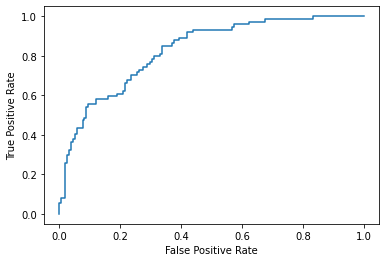

In [241]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plot_roc_curve(y_test, y_test_prob)

In [ ]:
#******************************Drafts******************************************

In [139]:
#fine binning

labels=['A','B','C','D','E']
pf['DPF_fine_bins']=pd.qcut(pf['DiabetesPedigreeFunction'],q=5,labels=labels)

In [140]:
pf.groupby('DPF_fine_bins').agg({'Outcome':['count','mean'],
                                 'DiabetesPedigreeFunction':['min','max']})

Outcome           DiabetesPedigreeFunction       
                count      mean                      min    max
DPF_fine_bins                                                  
A                 154  0.220779                    0.078  0.219
B                 153  0.326797                    0.220  0.302
C                 154  0.337662                    0.303  0.454
D                 154  0.363636                    0.455  0.687
E                 153  0.496732                    0.692  2.420

In [ ]:
  if x <= 22: return 'age: A(0,22]'
    elif x <= 25: return 'age: B(22,25]'
    elif x <= 30: return 'age: C(25,30]'
    elif x <= 40: return 'age: D(30,40]'
    else: return 'age: E(40,40+]'

In [262]:
#Alternative way to create bands 
pf.loc[pf['Age'] <=22,'age_band'] = 'age: A(0,22]'
pf.loc[(pf['Age'] >22) & (pf['Age'] <=25),'age_band'] = 'age: B(22,25]'
pf.loc[(pf['Age'] >25) & (pf['Age'] <=30),'age_band'] = 'age: C(25,30]'
pf.loc[(pf['Age'] >30) & (pf['Age']<=40),'age_band'] = 'age: D(30,40]'
pf.loc[(pf['Age'] >40) ,'age_band'] = 'age: E(40,40+]'

In [257]:
pf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_band
0,6,148,72,35,0,33.6,0.627,50,1,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN
3,1,89,66,23,94,28.1,0.167,21,0,"age: A(0,22]"
4,0,137,40,35,168,43.1,2.288,33,1,NaN
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,NaN
764,2,122,70,27,0,36.8,0.340,27,0,NaN
765,5,121,72,23,112,26.2,0.245,30,0,NaN
766,1,126,60,0,0,30.1,0.349,47,1,NaN


In [17]:
def preg_band(x):
    if x <= 0: return 'preg: A[0,0]'
    elif x <= 1: return 'preg: B(0,1]'
    elif x <= 4: return 'preg: C(1,4]'
    elif x <= 7: return 'preg: D(4,7]'
    else: return 'preg: E(7,7+]'

def bp_band(x):
    if x <= 60: return 'bp: A[0,60]'
    elif x <= 68: return 'bp: B(60,68]'
    elif x <= 74: return 'bp: C(68,74]'
    elif x <= 82: return 'bp: D(74,82]'
    else: return 'bp: E(82,82+]'

    
def age_band(x):
    if x <= 22: return 'age: A(0,22]'
    elif x <= 25: return 'age: B(22,25]'
    elif x <= 30: return 'age: C(25,30]'
    elif x <= 40: return 'age: D(30,40]'
    else: return 'age: E(40,40+]'

def glucose_band(x):
    if x <= 95: return 'glucose: A[0,95]'
    elif x <= 110: return 'glucose: B(95,110]'
    elif x <= 125: return 'glucose: C(110,125]'
    elif x <= 150: return 'glucose: D(125,150]'
    else: return 'glucose: E(150,150+]'
    
def bmi_band(x):
    if x <= 26: return 'bmi: A[0,26]'
    elif x <= 30: return 'bmi: B(26,30]'
    elif x <= 40: return 'bmi: C(30,40]'
    else: return 'bmi: D(40,40+]'


#def SThickness_band(x):

#def insulin(x)_band:

#def DPF_band

In [13]:
pf['age_band'] = pf['Age'].apply(age_band)
pf['bp_band'] = pf['BloodPressure'].apply(bp_band)
pf['preg_band'] = pf['Pregnancies'].apply(preg_band)
pf['glucose_band'] = pf['Glucose'].apply(glucose_band)
pf['bmi_band'] = pf['BMI'].apply(bmi_band)

In [26]:
pf['age_band']=pf.apply(lambda row: age_band(row['Age']),axis=1)
pf['bp_band']=pf.apply(lambda row: bp_band(row['BloodPressure']),axis=1)
pf['preg_band']=pf.apply(lambda row: preg_band(row['Pregnancies']),axis=1)
pf['glucose_band']=pf.apply(lambda row: glucose_band(row['Glucose']),axis=1)
pf['bmi_band']=pf.apply(lambda row: bmi_band(row['BMI']),axis=1)

In [39]:
for group, frame in pf.groupby(age_band):
    print('there are'+ str(len(frame))+ 'in'+ str(group))

there are23inage: A(0,22]
there are3inage: B(22,25]
there are5inage: C(25,30]
there are10inage: D(30,40]
there are727inage: E(40,40+]


In [37]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   age_band                  768 non-null    object 
 10  bp_band                   768 non-null    object 
 11  preg_band                 768 non-null    object 
 12  glucose_band              768 non-null    object 
 13  bmi_band                  768 non-null    object 
dtypes: float64

In [34]:
df=pd.get_dummies(pf[['age_band','glucose_band','bmi_band']],drop_first=True)

In [168]:
df

,"age_band_age: B(22,25]","age_band_age: C(25,30]","age_band_age: D(30,40]","age_band_age: E(40,40+]","glucose_band_glucose: B(95,110]","glucose_band_glucose: C(110,125]","glucose_band_glucose: D(125,150]","glucose_band_glucose: E(150,150+]","bmi_band_bmi: B(26,30]","bmi_band_bmi: C(30,40]","bmi_band_bmi: D(40,40+]"
0,0,0,0,1,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,1,1,0,0,0,0,1,0
764,0,1,0,0,0,1,0,0,0,1,0
765,0,1,0,0,0,1,0,0,1,0,0
766,0,0,0,1,0,0,1,0,0,1,0


In [169]:
df['Outcome']=pf['Outcome']

In [170]:
X=df.iloc[:,:-1]
y=df[['Outcome']]

In [223]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf = linear_model.LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)

/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [1]:
y_test_pred=clf.predict(X_test)
y_test_prob=logr.predict_proba(X_test)

NameError: name 'clf' is not defined

In [173]:
confusion_matrix(y_test, y_test_pred)

array([[143,  14],
       [ 38,  36]])

In [174]:
feature_names = features_cols
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_test_pred, target_names=target_names))
#predicition is better for 'without diabetes' than 'with diabetes'

                  precision    recall  f1-score   support

without diabetes       0.79      0.91      0.85       157
   with diabetes       0.72      0.49      0.58        74

        accuracy                           0.77       231
       macro avg       0.76      0.70      0.71       231
    weighted avg       0.77      0.77      0.76       231



/Users/wentingpwt/miniforge3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Age
- BMI
- BloodPressure
- DiabetesPedigreeFunction
- Glucose
- ...
Feature names seen at fit time, yet now missing:
- age_band_age: B(22,25]
- age_band_age: C(25,30]
- age_band_age: D(30,40]
- age_band_age: E(40,40+]
- bmi_band_bmi: B(26,30]
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 13 features, but LogisticRegression is expecting 19 features as input.

In [166]:
df

,"age_band_age: B(22,25]","age_band_age: C(25,30]","age_band_age: D(30,40]","age_band_age: E(40,40+]","glucose_band_glucose: B(95,110]","glucose_band_glucose: C(110,125]","glucose_band_glucose: D(125,150]","glucose_band_glucose: E(150,150+]","bmi_band_bmi: B(26,30]","bmi_band_bmi: C(30,40]","bmi_band_bmi: D(40,40+]",Outcome
0,0,0,0,1,0,0,1,0,0,1,0,1
1,0,0,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,1,1,0,0,0,0,1,0,0
764,0,1,0,0,0,1,0,0,0,1,0,0
765,0,1,0,0,0,1,0,0,1,0,0,0
766,0,0,0,1,0,0,1,0,0,1,0,1


In [167]:
X=df.iloc[:,:-1]

In [168]:
y=df.iloc[:,-1]

In [169]:
X

,"age_band_age: B(22,25]","age_band_age: C(25,30]","age_band_age: D(30,40]","age_band_age: E(40,40+]","glucose_band_glucose: B(95,110]","glucose_band_glucose: C(110,125]","glucose_band_glucose: D(125,150]","glucose_band_glucose: E(150,150+]","bmi_band_bmi: B(26,30]","bmi_band_bmi: C(30,40]","bmi_band_bmi: D(40,40+]"
0,0,0,0,1,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,1,1,0,0,0,0,1,0
764,0,1,0,0,0,1,0,0,0,1,0
765,0,1,0,0,0,1,0,0,1,0,0
766,0,0,0,1,0,0,1,0,0,1,0


In [170]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
logr = linear_model.LogisticRegression(max_iter=1000)
logr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [53]:
y_test_pred=logr.predict(X_test)

In [54]:
metrics.accuracy_score(y_test,y_test_pred)

0.7792207792207793

In [55]:
metrics.roc_auc_score(y_test,y_test_pred)

0.7125580995007746

In [56]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_test_pred, target_names=target_names))

#default threshold is 0.5
#precision:  tp/(tp+fp)
#recall: tp/(tp+fn)
#F1 score: 2*precision*recall/(precision+recall)
#accuracy: (tp+tn)/(tp+tn+fp+fn)

                  precision    recall  f1-score   support

without diabetes       0.80      0.90      0.85       157
   with diabetes       0.71      0.53      0.60        74

        accuracy                           0.78       231
       macro avg       0.76      0.71      0.73       231
    weighted avg       0.77      0.78      0.77       231



In [57]:
logr.coef_

array([[ 0.08623671,  0.0340891 , -0.01170181,  0.0062134 , -0.00126326,
         0.08995698,  0.68403888,  0.02491014]])

In [85]:
accuracy_score(y_test,y_test_pred)

0.7792207792207793

In [86]:
roc_auc_score(y_test,y_test_prob)

0.8346531244620417

In [59]:
y_test_pred=logr.predict(X_test)
y_test_prob=logr.predict_proba(X_test)[:,-1]

In [177]:
y_test

12     0
49     0
571    0
706    1
537    0
      ..
290    0
291    1
98     0
379    0
549    0
Name: Outcome, Length: 231, dtype: int64

In [178]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [45]:
y_test_prob

array([0.95488441, 0.15839979, 0.08338528, 0.64131919, 0.10945915,
       0.03537768, 0.72976075, 0.85155294, 0.32687832, 0.39454896,
       0.55865474, 0.96144165, 0.28170234, 0.13508154, 0.117654  ,
       0.14745344, 0.86057357, 0.02314359, 0.46245644, 0.23762164,
       0.66837895, 0.39149725, 0.17890766, 0.06933227, 0.04516936,
       0.3427648 , 0.04014247, 0.90296645, 0.10483917, 0.13181731,
       0.46519366, 0.24488757, 0.08877107, 0.43692815, 0.09249818,
       0.71632617, 0.46722244, 0.08196521, 0.33003873, 0.74041816,
       0.26028203, 0.19852638, 0.1468823 , 0.82953412, 0.78217466,
       0.00739574, 0.08151672, 0.19911785, 0.33206058, 0.280617  ,
       0.38639663, 0.17661421, 0.87297611, 0.50921307, 0.13662768,
       0.00237204, 0.05956218, 0.56159879, 0.25134598, 0.05479932,
       0.75888901, 0.46737063, 0.09932073, 0.66251556, 0.67762883,
       0.89084605, 0.72646677, 0.14037599, 0.34022934, 0.10887584,
       0.1141408 , 0.36254009, 0.09837706, 0.94735814, 0.84196

In [60]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plot_roc_curve(y_test, y_test_prob)

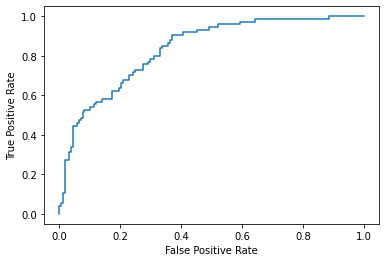

In [ ]:
#Decreasing thresholds on the decision function used to compute fpr and tpr.
#thresholds[0] represents no instances being predicted and is arbitrarily set to np.inf.

In [65]:
type(np.inf)

float

In [183]:
type(X_test)

pandas.core.frame.DataFrame

In [89]:
#Cross validation
logr = linear_model.LogisticRegression(max_iter=1000)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(logr, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.77272727 0.72077922 0.76623377 0.82352941 0.77124183]
Average CV Score:  0.770902300314065


In [68]:
X_test['pred']=y_test_pred

In [69]:
X_test['prob']=y_test_prob

In [72]:
X_test.sort_values(by=['prob'],ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred,prob
546,5,187,76,27,207,43.6,1.034,53,1,0.961442
193,11,135,0,0,0,52.3,0.578,40,1,0.956520
661,1,199,76,43,0,42.9,1.394,22,1,0.954884
622,6,183,94,0,0,40.8,1.461,45,1,0.947358
45,0,180,66,39,0,42.0,1.893,25,1,0.939670
...,...,...,...,...,...,...,...,...,...,...
55,1,73,50,10,0,23.0,0.248,21,0,0.023144
62,5,44,62,0,0,25.0,0.587,36,0,0.021809
97,1,71,48,18,76,20.4,0.323,22,0,0.018139
145,0,102,75,23,0,0.0,0.572,21,0,0.007396


In [191]:
type(y_test)

pandas.core.series.Series

In [73]:
y_df = pd.DataFrame({'Outcome': y_test})

In [193]:
y_df

,Outcome
12,0
49,0
571,0
706,1
537,0
...,...
290,0
291,1
98,0
379,0


In [6]:
pf.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [58]:
features_cols = ['Pregnancies',  'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [59]:
X=pf[features_cols]

In [60]:
y=pf['Glucose']

In [61]:
# Fit regression model
#regr_1 = DecisionTreeRegressor(max_depth=2)
clf = DecisionTreeRegressor(max_depth=3)
#regr_1.fit(X, y)
clf.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [ ]:
clf.feature_names_in_

In [ ]:
clf.feature_importances_

In [39]:
feature_names = features_cols
target_name = ['Glucose']

In [28]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file='tree.dot') 

In [30]:
dot_data

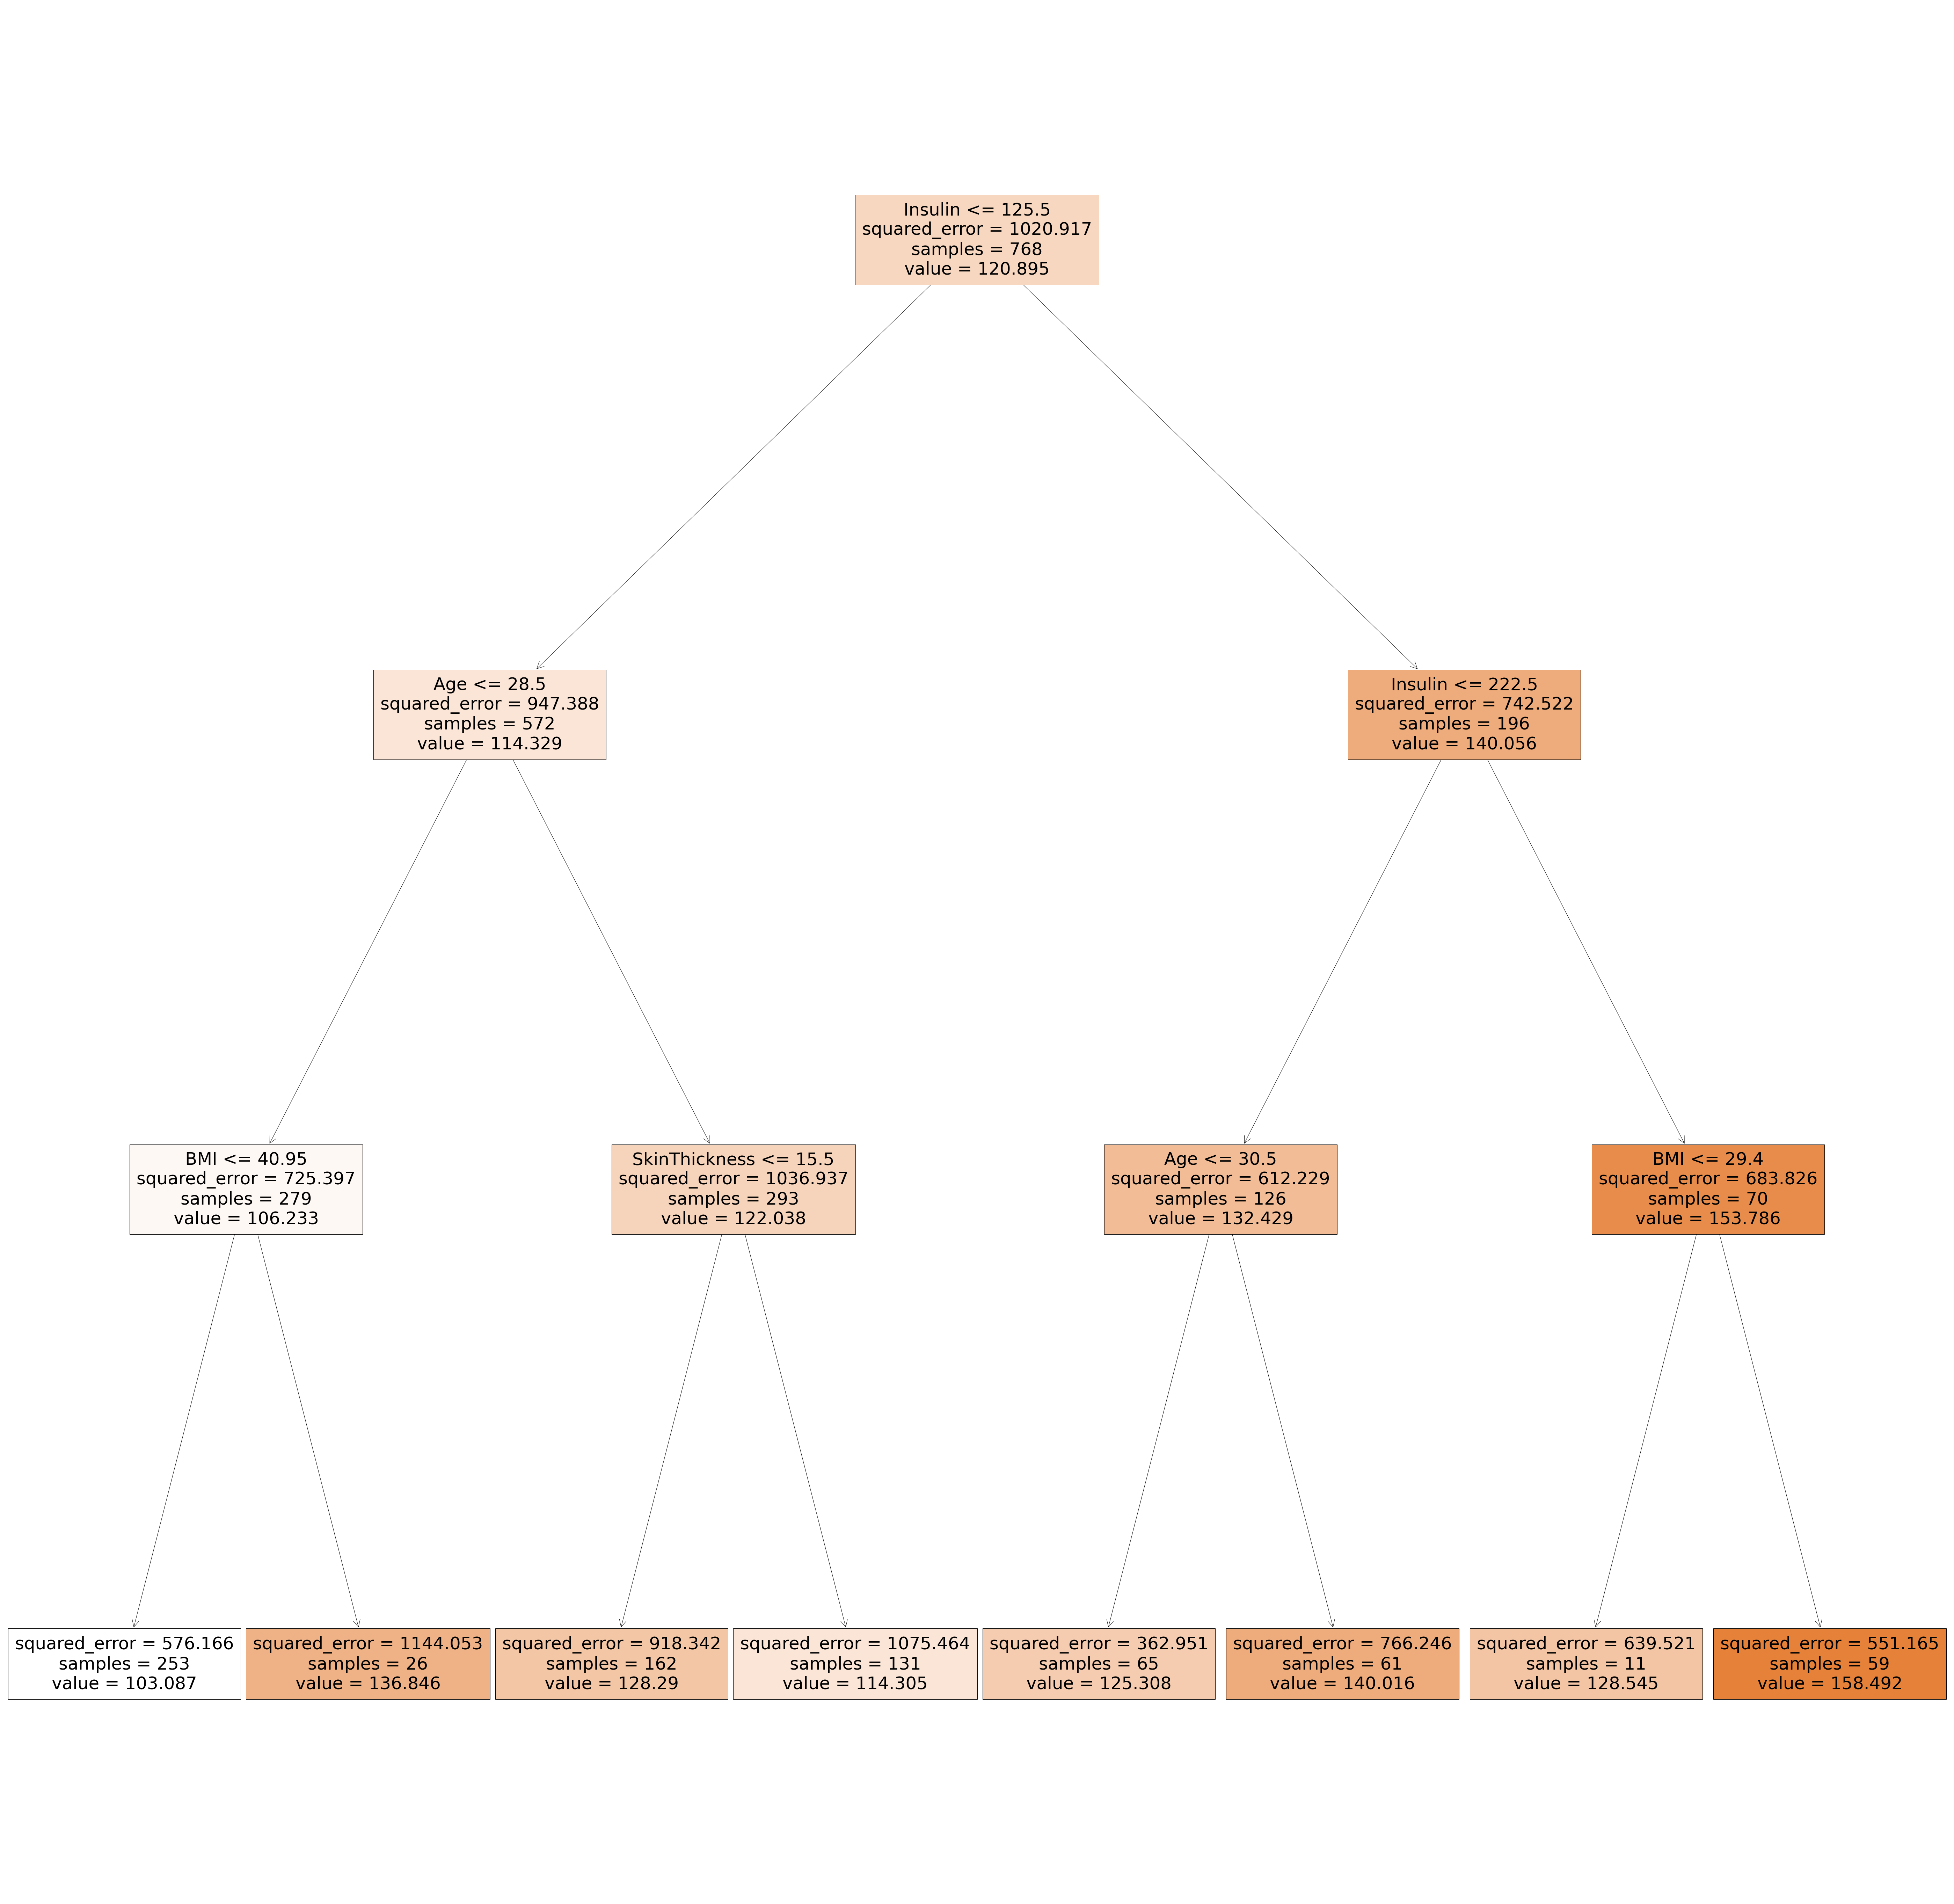

In [40]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=target_name,
                   filled=True)

1.5456

In [3]:
data=pd.read_csv('norway_new_car_sales_by_make.csv')
data['Period']=data['Year'].astype(str)+'-'+data['Month'].astype(str).str.zfill(2)

In [4]:
df=pd.pivot_table(data=data,values='Quantity',index='Make',columns='Period',aggfunc='sum',fill_value=0)

In [4]:
df

Period,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,...,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01
Make,,,,,,,,,,,,,,,,,,,,,
Alfa Romeo,16,9,21,20,17,21,14,12,15,10,...,3,1,2,1,6,15,3,4,3,6
Aston Martin,0,0,1,0,4,3,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Audi,599,498,682,556,630,498,562,590,393,554,...,685,540,551,687,794,688,603,645,827,565
BMW,352,335,365,360,431,477,403,348,271,562,...,1052,832,808,636,1031,1193,1096,1663,866,1540
Bentley,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Think,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Toyota,2884,1885,1833,1300,1866,1620,1901,1783,1303,1648,...,1432,1687,1603,1127,1824,1823,1327,1375,1238,1526
Volkswagen,2521,1517,1428,1257,1934,1531,1777,1665,1373,1941,...,3017,2222,2287,2076,2359,2084,2161,2106,2239,1688


In [7]:
df.index

Index(['Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Binz',
       'Cadillac', 'Chevrolet', 'Chevrolet US', 'Chrysler', 'Citroen', 'DS',
       'Dacia', 'Daihatsu', 'Dodge', 'Ferrari', 'Fiat', 'Fisker', 'Ford',
       'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Iveco', 'Jaguar', 'Jeep',
       'Kia', 'Koenigsegg', 'Lamborghini', 'Lancia', 'Land Rover', 'Lexus',
       'Lotus', 'MINI', 'Martin Motors', 'Maserati', 'Mazda', 'McLaren',
       'Mercedes-Benz', 'Mia', 'Mitsubishi', 'Morgan', 'Nilsson', 'Nissan',
       'Opel', 'Peugeot', 'Polaris', 'Porsche', 'Renault', 'Saab', 'Seat',
       'Secma', 'Skoda', 'Smart', 'Ssangyong', 'Subaru', 'Suzuki', 'Tata',
       'Tazzari', 'Tesla', 'Think', 'Toyota', 'Volkswagen', 'Volvo',
       'Westfield'],
      dtype='object', name='Make')

In [204]:
df.to_csv('out.csv')

In [11]:
x_len=12
y_len=1
test_loops=12

D=df.values
rows,periods=D.shape

loops=periods+1-x_len-y_len

train=[]
ind=[]
for col in range(loops):
    train.append(D[:,col:col+x_len+y_len])
    ind.append(df.index.values)
train=np.vstack(train)

In [54]:
df.index.to_list()

['Alfa Romeo',
 'Aston Martin',
 'Audi',
 'BMW',
 'Bentley',
 'Binz',
 'Cadillac',
 'Chevrolet',
 'Chevrolet US',
 'Chrysler',
 'Citroen',
 'DS',
 'Dacia',
 'Daihatsu',
 'Dodge',
 'Ferrari',
 'Fiat',
 'Fisker',
 'Ford',
 'Honda',
 'Hyundai',
 'Infiniti',
 'Isuzu',
 'Iveco',
 'Jaguar',
 'Jeep',
 'Kia',
 'Koenigsegg',
 'Lamborghini',
 'Lancia',
 'Land Rover',
 'Lexus',
 'Lotus',
 'MINI',
 'Martin Motors',
 'Maserati',
 'Mazda',
 'McLaren',
 'Mercedes-Benz',
 'Mia',
 'Mitsubishi',
 'Morgan',
 'Nilsson',
 'Nissan',
 'Opel',
 'Peugeot',
 'Polaris',
 'Porsche',
 'Renault',
 'Saab',
 'Seat',
 'Secma',
 'Skoda',
 'Smart',
 'Ssangyong',
 'Subaru',
 'Suzuki',
 'Tata',
 'Tazzari',
 'Tesla',
 'Think',
 'Toyota',
 'Volkswagen',
 'Volvo',
 'Westfield']

In [42]:
def datasets(df,x_len=12,y_len=1,test_loops=12):
    D=df.values
    rows,periods=D.shape
    
    loops=periods+1-x_len-y_len
    
    train=[]
    ind=[]
    for col in range(loops):
        train.append(D[:,col:col+x_len+y_len])
        ind=ind+df.index.to_list()
    train=np.vstack(train)
    df_train=pd.DataFrame(train,index=ind)
    
    X_train,Y_train = np.split(df_train,[-y_len],axis=1)
    
    if test_loops>0:
        X_train,X_test = np.split(X_train, [-rows*test_loops],axis=0)
        Y_train,Y_test = np.split(Y_train, [-rows*test_loops],axis=0)
    
    return X_train, Y_train, X_test, Y_test   

In [ ]:
X_train, Y_train, X_test, Y_test = datasets(df,x_len=12,y_len=1,test_loops=12)

In [50]:
clf_lr = linear_model.LinearRegression() 
clf_lr.fit(X_train,Y_train)
X_test['forecast']=clf_lr.predict(X_test) 

In [51]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,forecast
Alfa Romeo,1,3,3,3,3,9,4,5,0,3,3,0,2.950740
Aston Martin,0,0,2,2,0,0,0,0,0,0,0,0,0.985443
Audi,474,598,665,585,640,754,541,494,549,592,496,559,501.440057
BMW,636,785,733,693,849,617,860,777,1010,934,1024,1089,929.615421
Bentley,0,0,0,0,0,0,0,0,0,0,0,0,1.361698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Think,0,0,0,0,0,0,0,0,0,0,0,0,1.361698
Toyota,1106,1374,1537,1432,1687,1603,1127,1824,1823,1327,1375,1238,1213.752553
Volkswagen,1743,2044,2236,3017,2222,2287,2076,2359,2084,2161,2106,2239,1958.293744
Volvo,643,732,687,748,619,766,635,463,763,732,754,1235,833.083479


In [251]:
r2_score(Y_test,Y_test_pred)

0.951766202431755

In [283]:
def kpi_ML(Y_train,Y_train_pred,Y_test,Y_test_pred,name=''):
    df=pd.DataFrame(columns=['MAE','RMSE','Bias'],index=['Train','Test'])
    df.index.name=name
    df.loc['Train','MAE']=100*np.mean(abs(Y_train-Y_train_pred))/np.mean(Y_train)
    df.loc['Train','RMSE']=100*np.sqrt(np.mean((Y_train-Y_train_pred)**2))/np.mean(Y_train)
    df.loc['Train','Bias']=100*np.mean((Y_train-Y_train_pred))/np.mean(Y_train)
    
    df.loc['Test','MAE']=100*np.mean(abs(Y_test-Y_test_pred))/np.mean(Y_test)
    df.loc['Test','RMSE']=100*np.sqrt(np.mean((Y_test-Y_test_pred)**2))/np.mean(Y_test)
    df.loc['Test','Bias']=100*np.mean((Y_test-Y_test_pred))/np.mean(Y_test)
    
    df=df.astype(float).round(1)
    print(df)

kpi_ML(Y_train,Y_train_pred,Y_test,Y_test_pred,name='Regression')

             MAE  RMSE  Bias
Regression                  
Train       17.8  43.9  -0.0
Test        17.8  43.7   1.6
